# TASK 1 : Exploratory Data Analysis (EDA) and Business Insights

## load the datasets

### import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the datasets

In [ ]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [ ]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
products.head()


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Check for missing values

In [ ]:
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [ ]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [ ]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## Clean and Merge the Data

### Convert date columns to datetime

In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Merge datasets

In [ ]:
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

In [ ]:
merged_data.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68,Anna Ball,South America,2022-05-17,ComfortLiving Bluetooth Speaker,Electronics,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68,Jeremy Mclaughlin,South America,2024-09-17,ComfortLiving Bluetooth Speaker,Electronics,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,David Li,North America,2024-01-13,ComfortLiving Bluetooth Speaker,Electronics,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68,Miguel Wong,North America,2024-01-30,ComfortLiving Bluetooth Speaker,Electronics,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68,Robert Jones,South America,2023-04-19,ComfortLiving Bluetooth Speaker,Electronics,300.68


### Verify if both price columns are identical

In [ ]:
print((merged_data['Price_x'] == merged_data['Price_y']).all())

True


### Drop one of the columns

In [ ]:
merged_data = merged_data.drop(columns=['Price_x'])
merged_data = merged_data.rename(columns={'Price_y': 'Price'})

### Save the merged dataset to a CSV file

In [ ]:
merged_data.to_csv('Merged_Dataset.csv', index=False)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   CustomerName     1000 non-null   object        
 7   Region           1000 non-null   object        
 8   SignupDate       1000 non-null   datetime64[ns]
 9   ProductName      1000 non-null   object        
 10  Category         1000 non-null   object        
 11  Price            1000 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [ ]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


## analyze key trends

### Customer Analysis: Number of customers by region

In [ ]:
print(customers['Region'].value_counts())

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


### Customer Analysis: Signup trends

In [ ]:
customers['SignupYear'] = customers['SignupDate'].dt.year
print(customers['SignupYear'].value_counts())

SignupYear
2024    79
2022    64
2023    57
Name: count, dtype: int64


### Product Analysis: Top-selling categories

In [ ]:
print(merged_data['Category'].value_counts())

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


### Product Analysis: Most expensive products

In [ ]:
print(products.sort_values(by='Price', ascending=False).head())

   ProductID           ProductName     Category   Price
74      P075      TechPro Textbook        Books  497.76
31      P032    BookWorld Cookbook        Books  488.63
44      P045     SoundWave T-Shirt     Clothing  481.78
16      P017   ActiveWear Textbook        Books  469.77
36      P037  SoundWave Smartwatch  Electronics  459.86


### Transaction Trends: Monthly revenue

In [ ]:
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
print(merged_data.groupby('TransactionMonth')['TotalValue'].sum())

TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


### Region Insights: Revenue by region

In [ ]:
print(merged_data.groupby('Region')['TotalValue'].sum())

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


## Business Insights

### Most Revenue-Generating Regions

In [ ]:
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_revenue)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


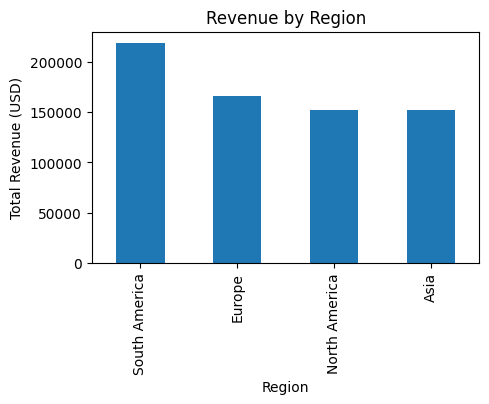

In [ ]:
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_revenue.plot(kind='bar', figsize=(5, 3), title='Revenue by Region')
plt.ylabel('Total Revenue (USD)')
plt.show()

### Top Categories

In [ ]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_revenue)

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


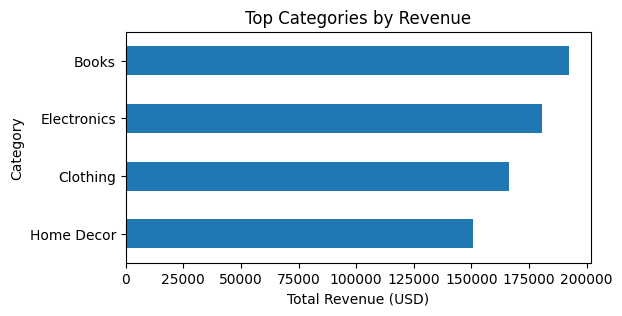

In [ ]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values()
category_revenue.plot(kind='barh', figsize=(6, 3), title='Top Categories by Revenue')
plt.xlabel('Total Revenue (USD)')
plt.show()

### Customer Trends (High Spenders)

In [ ]:
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print(customer_revenue.head(10))

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


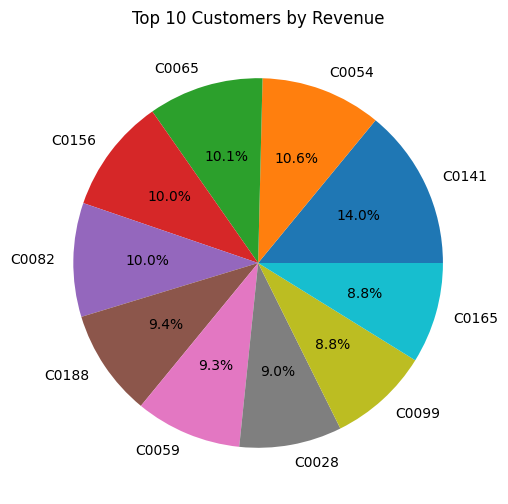

In [ ]:
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), title='Top 10 Customers by Revenue')
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.show()

### Seasonal Trends

In [ ]:
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('TransactionMonth')['TotalValue'].sum()
print(monthly_revenue)

TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


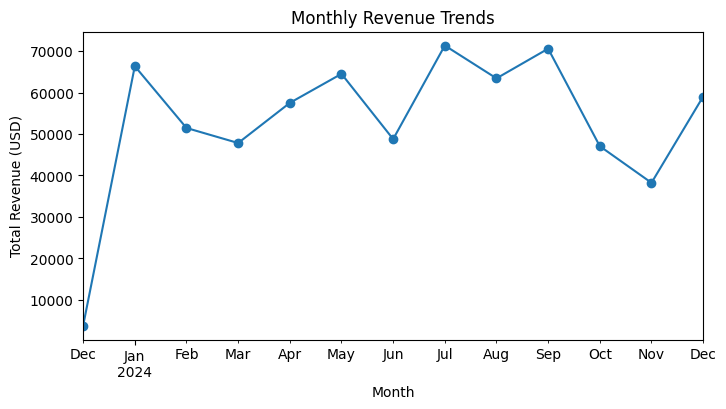

In [ ]:
monthly_revenue = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_revenue.plot(kind='line', figsize=(8, 4), title='Monthly Revenue Trends', marker='o')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Month')
plt.show()

### Underperforming Products

In [ ]:
product_performance = merged_data.groupby('ProductName').agg({'Quantity': 'sum', 'TotalValue': 'sum'})
print(product_performance.sort_values(by='TotalValue').head(10))

                             Quantity  TotalValue
ProductName                                      
ComfortLiving Laptop               24      647.76
ActiveWear T-Shirt                 26      795.34
ComfortLiving Rug                  19     1063.81
SoundWave Bluetooth Speaker        19     1223.22
ComfortLiving Desk Lamp            26     1694.16
BookWorld Rug                      18     1722.42
ComfortLiving Headphones           15     2394.00
BookWorld Bluetooth Speaker        19     2790.15
HomeSense Headphones               18     2860.74
ActiveWear Biography               18     3047.40


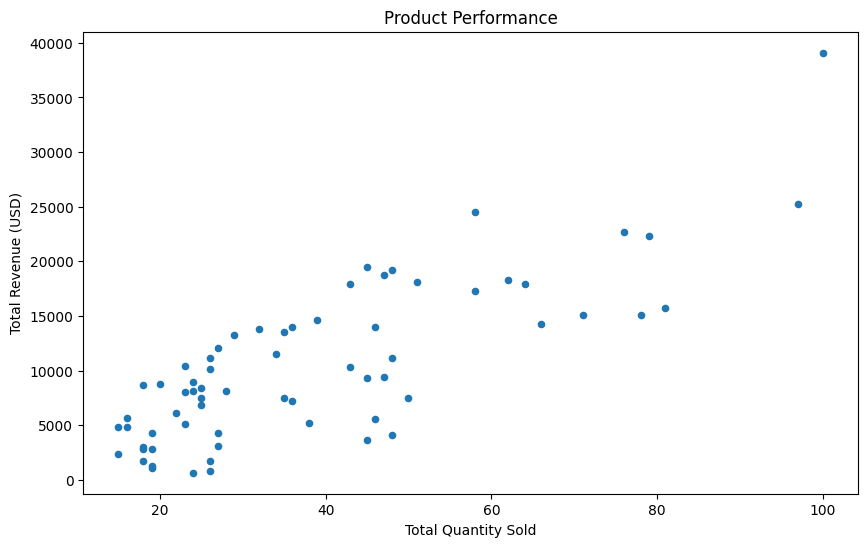

In [ ]:
product_performance.plot(kind='scatter', x='Quantity', y='TotalValue', figsize=(10, 6), title='Product Performance')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Revenue (USD)')
plt.show()

### Repeat Customers vs One-Time Shoppers

In [ ]:
repeat_customers = merged_data['CustomerID'].value_counts()
repeat_count = (repeat_customers > 1).sum()
one_time_count = (repeat_customers == 1).sum()
print(f"Repeat Customers: {repeat_count}, One-Time Shoppers: {one_time_count}")

Repeat Customers: 187, One-Time Shoppers: 12


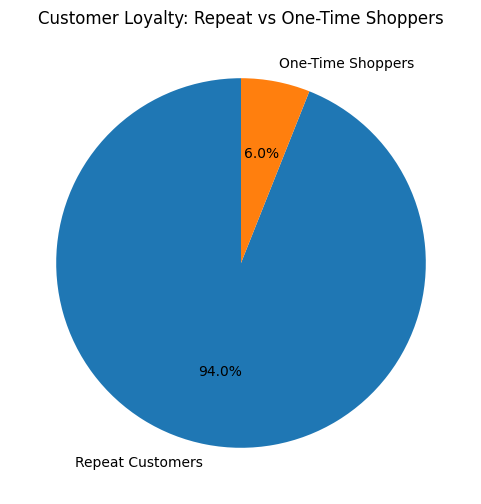

In [ ]:
labels = ['Repeat Customers', 'One-Time Shoppers']
sizes = [repeat_count, one_time_count]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Customer Loyalty: Repeat vs One-Time Shoppers')
plt.show()


### Top Products by Profit Margin(assuming Price reflects cost in Products dataset)

In [ ]:
merged_data['Profit'] = merged_data['TotalValue'] - (merged_data['Quantity'] * merged_data['Price'])
top_profit_products = merged_data.groupby('ProductName')['Profit'].sum().sort_values(ascending=False).head(10)
print(top_profit_products)

ProductName
TechPro Cookbook            9.094947e-13
ComfortLiving Smartwatch    9.094947e-13
ActiveWear Smartwatch       6.821210e-13
SoundWave Jeans             6.821210e-13
BookWorld Cookbook          4.547474e-13
ActiveWear Smartphone       4.547474e-13
SoundWave Cookbook          4.263256e-13
HomeSense Rug               3.694822e-13
TechPro Rug                 3.410605e-13
SoundWave Novel             2.273737e-13
Name: Profit, dtype: float64


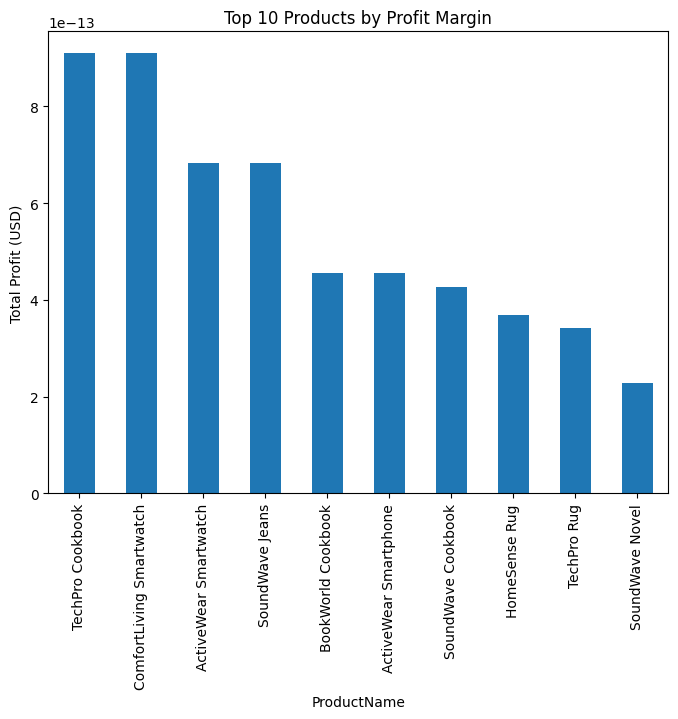

In [ ]:
top_profit_products.plot(kind='bar', figsize=(8, 6), title='Top 10 Products by Profit Margin')
plt.ylabel('Total Profit (USD)')
plt.show()


### Customer Lifetime Value (CLTV) : Top 10 high-value customers

In [ ]:
cltv = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print(cltv.head(10))

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


<ipython-input-132-f5f306b68cb4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cltv.values, y=cltv.index, palette="viridis")


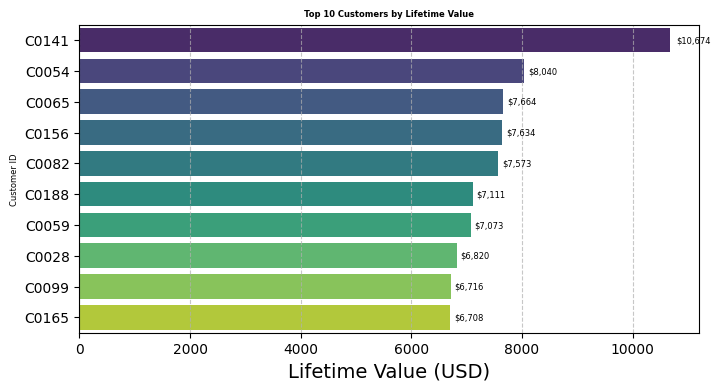

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=cltv.values, y=cltv.index, palette="viridis")
plt.title("Top 10 Customers by Lifetime Value", fontsize=6, fontweight='bold')
plt.xlabel("Lifetime Value (USD)", fontsize=14)
plt.ylabel("Customer ID", fontsize=6)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(cltv.values):
    plt.text(value * 1.01, index, f"${value:,.0f}", fontsize=6, va='center', ha='left', color='black')
plt.show()


### Customer Segmentation by Spending Patterns  (e.g., high spenders, mid-tier, low spenders) to tailor marketing strategies.


In [ ]:
merged_data['CustomerTotalSpend'] = merged_data.groupby('CustomerID')['TotalValue'].transform('sum')
bins = [0, 500, 2000, 10000]  # Example bins for spenders
labels = ['Low Spenders', 'Mid-Tier Spenders', 'High Spenders']
merged_data['SpenderCategory'] = pd.cut(merged_data['CustomerTotalSpend'], bins=bins, labels=labels)
print(merged_data['SpenderCategory'].value_counts())

SpenderCategory
High Spenders        880
Mid-Tier Spenders    104
Low Spenders           6
Name: count, dtype: int64


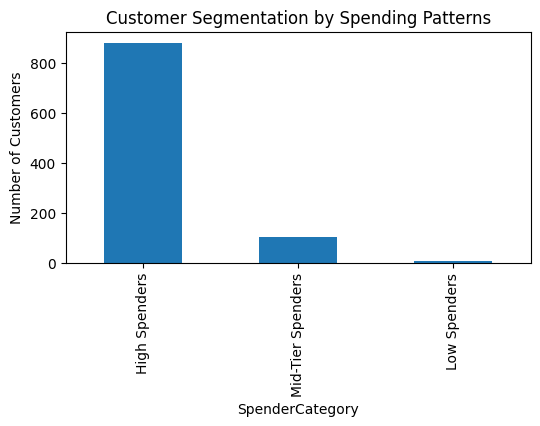

In [ ]:
spender_distribution = merged_data['SpenderCategory'].value_counts()

spender_distribution.plot(kind='bar', figsize=(6, 3), title='Customer Segmentation by Spending Patterns')
plt.ylabel('Number of Customers')
plt.show()

### Regional Product Preferences

In [ ]:
regional_preferences = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()
print(regional_preferences)

Category          Books  Clothing  Electronics  Home Decor
Region                                                    
Asia           33119.03  49353.09     35658.15    33944.70
Europe         47464.42  36335.59     41562.60    40892.02
North America  41811.99  38038.49     44716.43    27746.49
South America  69752.03  42443.49     58846.32    48310.72


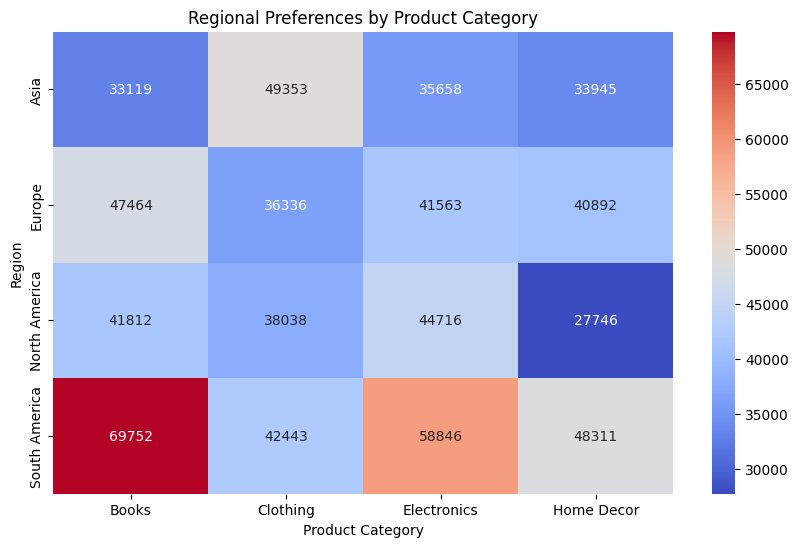

In [ ]:
import seaborn as sns

regional_preferences = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(regional_preferences, annot=True, fmt=".0f", cmap="coolwarm")
plt.title('Regional Preferences by Product Category')
plt.ylabel('Region')
plt.xlabel('Product Category')
plt.show()

### High Traffic Days

In [ ]:
merged_data['DayOfWeek'] = merged_data['TransactionDate'].dt.day_name()
high_traffic_days = merged_data.groupby('DayOfWeek')['TransactionID'].count().sort_values(ascending=False)
print(high_traffic_days)

DayOfWeek
Tuesday      163
Wednesday    158
Thursday     150
Monday       139
Sunday       139
Saturday     126
Friday       125
Name: TransactionID, dtype: int64


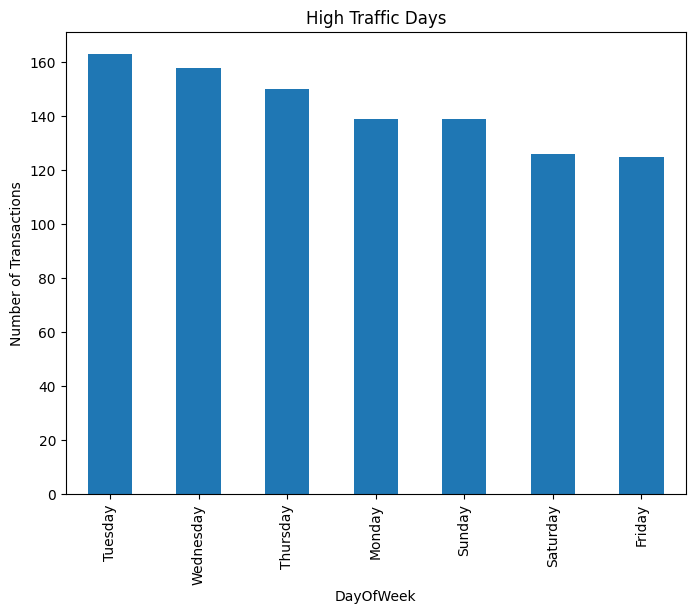

In [ ]:
high_traffic_days.plot(kind='bar', figsize=(8, 6), title='High Traffic Days')
plt.ylabel('Number of Transactions')
plt.show()


### Time to Conversion : average time between signup and first purchase to optimize onboarding campaigns.

In [ ]:
merged_data['SignupToPurchase'] = (merged_data['TransactionDate'] - merged_data['SignupDate']).dt.days
avg_conversion_time = merged_data.groupby('CustomerID')['SignupToPurchase'].min().mean()
print(f"Average Conversion Time: {avg_conversion_time} days")

Average Conversion Time: 228.75879396984925 days


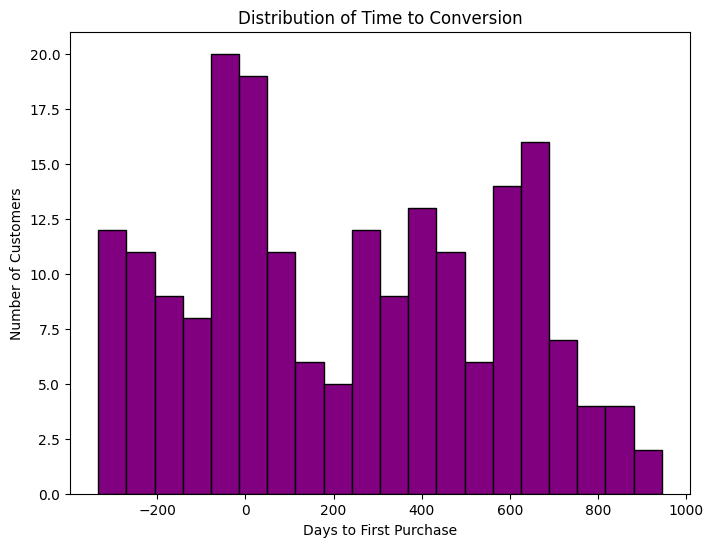

In [ ]:
conversion_time = merged_data.groupby('CustomerID')['SignupToPurchase'].min()

plt.figure(figsize=(8, 6))
plt.hist(conversion_time, bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Time to Conversion')
plt.xlabel('Days to First Purchase')
plt.ylabel('Number of Customers')
plt.show()


### Revenue Per Product Category by Region

In [ ]:
category_region_revenue = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum()
print(category_region_revenue.sort_values(ascending=False).head(10))

Region         Category   
South America  Books          69752.03
               Electronics    58846.32
Asia           Clothing       49353.09
South America  Home Decor     48310.72
Europe         Books          47464.42
North America  Electronics    44716.43
South America  Clothing       42443.49
North America  Books          41811.99
Europe         Electronics    41562.60
               Home Decor     40892.02
Name: TotalValue, dtype: float64


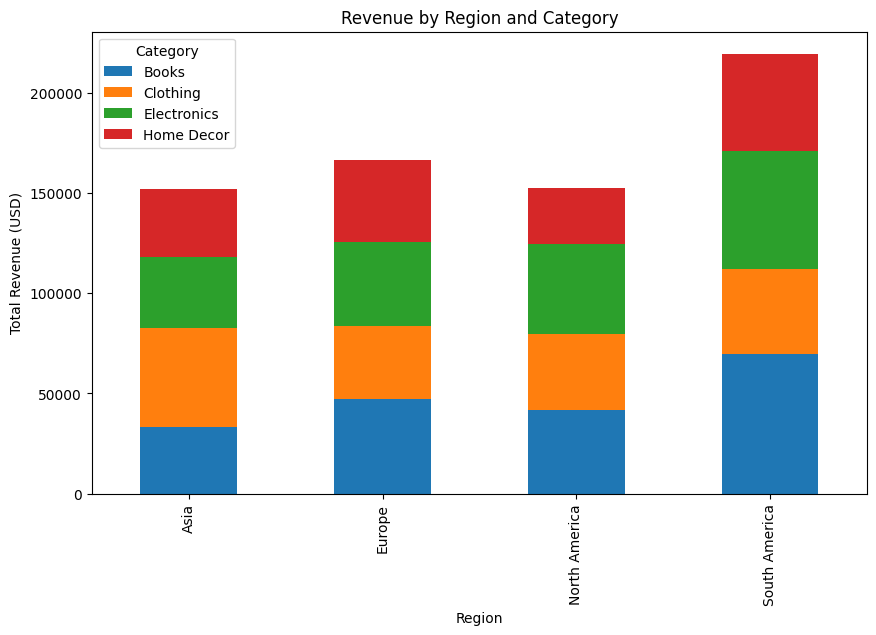

In [ ]:
category_region_revenue = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()

category_region_revenue.plot(kind='bar', stacked=True, figsize=(10, 6), title='Revenue by Region and Category')
plt.ylabel('Total Revenue (USD)')
plt.show()


### Product Performance Analysis (Quantity vs Revenue)

In [ ]:
product_analysis = merged_data.groupby('ProductName').agg({'Quantity': 'sum', 'TotalValue': 'sum'})
print(product_analysis.sort_values(by='TotalValue').head(10))
print(product_analysis.sort_values(by='TotalValue', ascending=False).head(10))

                             Quantity  TotalValue
ProductName                                      
ComfortLiving Laptop               24      647.76
ActiveWear T-Shirt                 26      795.34
ComfortLiving Rug                  19     1063.81
SoundWave Bluetooth Speaker        19     1223.22
ComfortLiving Desk Lamp            26     1694.16
BookWorld Rug                      18     1722.42
ComfortLiving Headphones           15     2394.00
BookWorld Bluetooth Speaker        19     2790.15
HomeSense Headphones               18     2860.74
ActiveWear Biography               18     3047.40
                         Quantity  TotalValue
ProductName                                  
ActiveWear Smartwatch         100    39096.97
SoundWave Headphones           97    25211.64
SoundWave Novel                58    24507.90
ActiveWear Jacket              76    22712.56
ActiveWear Rug                 79    22314.43
TechPro Headphones             45    19513.80
BookWorld Cookbook             4

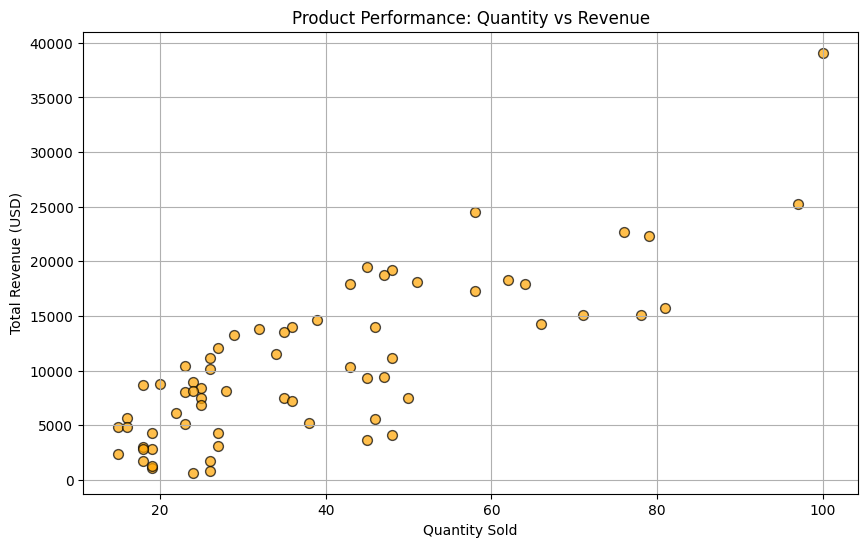

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(product_performance['Quantity'], product_performance['TotalValue'], alpha=0.7, s=50, color='orange', edgecolors='black')
plt.title('Product Performance: Quantity vs Revenue')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Revenue (USD)')
plt.grid(True)
plt.show()